In [1]:
# Deep Learning Libraries

from functools import partial
import numpy as np
import pandas as pd
from functools import partial
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

# General Libraries
from scipy.io import loadmat, savemat
from scipy.fft import fft, fftfreq, ifft
import h5py
import os

# Statistics Libraries
import statsmodels.api as sm
from statsmodels.stats.multitest import fdrcorrection
from scipy.stats import ttest_rel, mannwhitneyu

# Load Performance Results

In [4]:
# FIND FILES IN DIRECTORY STORING MODEL PERFORMANCE

load_path = '/data/users2/cellis42/Spectral_Explainability/DataAugmentation/ISBI2024/Performance'
dir_files = os.listdir(load_path)
file_paths = [s for s in dir_files if ".mat" in s]
file_paths = np.sort(file_paths)

print(file_paths)

['model_m1_v1.mat' 'model_m1_v2.mat' 'model_m1_v3.mat' 'model_m2.mat'
 'model_m2_v2.mat' 'model_m3.mat' 'model_m4.mat' 'model_m4_v2.mat'
 'model_m5.mat' 'model_m5_v2.mat' 'model_m6.mat' 'model_m6_v2.mat'
 'model_m7.mat' 'model_m7_v2.mat']


In [6]:
# LOAD AND STORE PERFORMANCE VALUES IN ARRAYS

acc_vals = []; bacc_vals = []; sens_vals = []; spec_vals = [];
for file_path in file_paths:
    testing_metrics = loadmat(os.path.join(load_path,file_path),appendmat=True)['testing_metrics']
    
    acc_vals.append(testing_metrics[:,0])
    bacc_vals.append(testing_metrics[:,3])
    sens_vals.append(testing_metrics[:,1])
    spec_vals.append(testing_metrics[:,2])
    
acc_vals = np.array(acc_vals)
bacc_vals = np.array(bacc_vals)
sens_vals = np.array(sens_vals)
spec_vals = np.array(spec_vals)

In [14]:
# CREATE ARRAY OF MODEL NAMES
index = ['M1.1','M1.2','M1.3','M2.1','M2.2','M3.1','M4.1','M4.2','M5.1','M5.2','M6.1','M6.2','M7.1','M7.2']

# COMPUTE MEAN, STANDARD DEVIATION, AND MEDIAN OF MODEL PERFORMANCE

print('BACC')
for i in range(np.shape(bacc_vals)[0]):
    print(index[i] + ' : ' + str(np.round(np.mean(bacc_vals[i,:]),4)) + ' (' +str(np.round(np.median(bacc_vals[i,:]),4))  + ') + ' + str(np.round(np.std(bacc_vals[i,:]),4)))

print('ACC')
for i in range(np.shape(acc_vals)[0]):
    print(index[i] + ' : ' + str(np.round(np.mean(acc_vals[i,:]),4)) + ' (' +str(np.round(np.median(acc_vals[i,:]),4))  + ') + ' + str(np.round(np.std(acc_vals[i,:]),4)))

print('SENS')
for i in range(np.shape(sens_vals)[0]):
    print(index[i] + ' : ' + str(np.round(np.mean(sens_vals[i,:]),4)) + ' (' +str(np.round(np.median(sens_vals[i,:]),4))  + ') + ' + str(np.round(np.std(sens_vals[i,:]),4)))

print('SPEC')
for i in range(np.shape(spec_vals)[0]):
    print(index[i] + ' : ' + str(np.round(np.mean(spec_vals[i,:]),4)) + ' (' +str(np.round(np.median(spec_vals[i,:]),4))  + ') + ' + str(np.round(np.std(spec_vals[i,:]),4)))


BACC
M1.1 : 0.8584 (0.9103) + 0.1594
M1.2 : 0.8823 (0.9216) + 0.1466
M1.3 : 0.8785 (0.8894) + 0.1127
M2.1 : 0.8861 (0.9116) + 0.1296
M2.2 : 0.8699 (0.922) + 0.1555
M3.1 : 0.8427 (0.9154) + 0.165
M4.1 : 0.8923 (0.9268) + 0.1126
M4.2 : 0.8784 (0.9255) + 0.1567
M5.1 : 0.8813 (0.9) + 0.1316
M5.2 : 0.8726 (0.9284) + 0.1579
M6.1 : 0.8853 (0.9256) + 0.134
M6.2 : 0.8667 (0.9255) + 0.1512
M7.1 : 0.8796 (0.947) + 0.1505
M7.2 : 0.8972 (0.9552) + 0.1251
ACC
M1.1 : 0.863 (0.873) + 0.1228
M1.2 : 0.8875 (0.9263) + 0.109
M1.3 : 0.8751 (0.8858) + 0.1132
M2.1 : 0.8866 (0.8936) + 0.103
M2.2 : 0.8781 (0.9222) + 0.1109
M3.1 : 0.8468 (0.8734) + 0.1334
M4.1 : 0.8828 (0.8958) + 0.1156
M4.2 : 0.8878 (0.9487) + 0.1169
M5.1 : 0.8839 (0.8874) + 0.1102
M5.2 : 0.8795 (0.9298) + 0.1231
M6.1 : 0.8882 (0.9183) + 0.1089
M6.2 : 0.8679 (0.8942) + 0.1204
M7.1 : 0.8905 (0.9479) + 0.1114
M7.2 : 0.9075 (0.9503) + 0.1014
SENS
M1.1 : 0.9279 (1.0) + 0.17
M1.2 : 0.9267 (0.9747) + 0.1151
M1.3 : 0.9164 (1.0) + 0.1886
M2.1 : 0.9162

# Comparison of Models A Through D - All Values

In [15]:
# PERFORMANCE OF STATISTICAL TESTING
n_tests = 14
p_vals_bacc = np.ones((n_tests,n_tests)); t_stat_bacc = np.zeros((n_tests,n_tests));
p_vals_acc = np.ones((n_tests,n_tests)); t_stat_acc = np.zeros((n_tests,n_tests));
p_vals_sens = np.ones((n_tests,n_tests)); t_stat_sens = np.zeros((n_tests,n_tests));
p_vals_spec = np.ones((n_tests,n_tests)); t_stat_spec = np.zeros((n_tests,n_tests));

# Pairwise Comparison of Performance
for i in range(n_tests):
    for j in range(n_tests):
        if i > j:
            t_stat_acc[i,j], p_vals_acc[i,j] = ttest_rel(acc_vals[i,:],acc_vals[j,:])
            t_stat_bacc[i,j], p_vals_bacc[i,j] = ttest_rel(bacc_vals[i,:],bacc_vals[j,:])
            t_stat_sens[i,j], p_vals_sens[i,j] = ttest_rel(sens_vals[i,:],sens_vals[j,:])
            t_stat_spec[i,j], p_vals_spec[i,j] = ttest_rel(spec_vals[i,:],spec_vals[j,:])

In [19]:
# MAKE TABLE FOR ACCURACY T-STATISTICS
index = ['M1.1','M1.2','M1.3','M2.1','M2.2','M3.1','M4.1','M4.2','M5.1','M5.2','M6.1','M6.2','M7.1','M7.2']
columns = []
for i in index:
    columns.append('-' + i)
pd.DataFrame(t_stat_acc,index=index,columns=columns)

,-M1.1,-M1.2,-M1.3,-M2.1,-M2.2,-M3.1,-M4.1,-M4.2,-M5.1,-M5.2,-M6.1,-M6.2,-M7.1,-M7.2
M1.1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
M1.2,1.369147,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
M1.3,1.061180,-0.804936,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
M2.1,1.246099,-0.126206,0.735485,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
M2.2,1.279570,-0.753891,0.246622,-0.569829,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
M3.1,-0.861894,-2.122808,-1.822057,-1.892062,-1.906624,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
M4.1,1.117601,-0.275437,0.453897,-0.198985,0.295629,2.506327,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
M4.2,1.519444,0.050710,0.940433,0.117161,0.917955,2.454751,0.326656,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
M5.1,1.016328,-0.401569,0.507731,-0.797353,0.347108,1.652133,0.053218,-0.321682,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
M5.2,0.858823,-0.752461,0.268081,-0.484167,0.099718,2.306395,-0.277928,-1.048662,-0.269593,0.000000,0.000000,0.000000,0.000000,0.0


In [20]:
# MAKE TABLE FOR ACCURACY P-VALUES
pd.DataFrame(p_vals_acc,index=index,columns=columns)

,-M1.1,-M1.2,-M1.3,-M2.1,-M2.2,-M3.1,-M4.1,-M4.2,-M5.1,-M5.2,-M6.1,-M6.2,-M7.1,-M7.2
M1.1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0
M1.2,0.183631,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0
M1.3,0.299171,0.428759,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0
M2.1,0.224755,0.900620,0.469171,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0
M2.2,0.212928,0.458248,0.807298,0.574090,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0
M3.1,0.397276,0.044281,0.080932,0.070608,0.068611,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0
M4.1,0.274801,0.785338,0.653981,0.843951,0.770056,0.019379,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0
M4.2,0.141716,0.959976,0.356366,0.907708,0.367776,0.021729,0.746760,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0
M5.1,0.319610,0.691554,0.616277,0.433065,0.731535,0.111532,0.957999,0.750479,1.000000,1.000000,1.000000,1.000000,1.000000,1.0
M5.2,0.398935,0.459091,0.790927,0.632657,0.921397,0.030034,0.783448,0.304780,0.789778,1.000000,1.000000,1.000000,1.000000,1.0


In [21]:
# RESHAPE STATISTICAL ANALYSIS RESULTS FOR USE WITH FDR CORRECTION FUNCTION
p_vals_bacc_reshaped = []; p_vals_acc_reshaped = []; p_vals_sens_reshaped = []; p_vals_spec_reshaped = [];

for row in range(1,np.shape(p_vals_bacc)[1]):
    for col in range(0,row):
        p_vals_bacc_reshaped.append(p_vals_bacc[row,col])
        p_vals_acc_reshaped.append(p_vals_acc[row,col])
        p_vals_sens_reshaped.append(p_vals_sens[row,col])
        p_vals_spec_reshaped.append(p_vals_spec[row,col])

In [22]:
# PERFORM FDR CORRECTION

p_vals_bacc_reshaped_corrected = fdrcorrection(p_vals_bacc_reshaped)[1]; p_vals_bacc_corrected = np.ones_like(p_vals_bacc)
p_vals_acc_reshaped_corrected = fdrcorrection(p_vals_acc_reshaped)[1]; p_vals_acc_corrected = np.ones_like(p_vals_acc)
p_vals_sens_reshaped_corrected = fdrcorrection(p_vals_sens_reshaped)[1]; p_vals_sens_corrected = np.ones_like(p_vals_sens)
p_vals_spec_reshaped_corrected = fdrcorrection(p_vals_spec_reshaped)[1]; p_vals_spec_corrected = np.ones_like(p_vals_spec)

# RESTORE ARRAY SHAPE TO ORIGINAL DIMENSIONS
idx = 0
for row in range(1,np.shape(p_vals_acc)[1]):
    for col in range(0,row):
        p_vals_bacc_corrected[row,col] = p_vals_bacc_reshaped_corrected[idx]
        p_vals_acc_corrected[row,col] = p_vals_acc_reshaped_corrected[idx]
        p_vals_sens_corrected[row,col] = p_vals_sens_reshaped_corrected[idx]
        p_vals_spec_corrected[row,col] = p_vals_spec_reshaped_corrected[idx]

        p_vals_u_bacc_corrected[row,col] = p_vals_u_bacc_reshaped_corrected[idx]
        p_vals_u_acc_corrected[row,col] = p_vals_u_acc_reshaped_corrected[idx]
        p_vals_u_sens_corrected[row,col] = p_vals_u_sens_reshaped_corrected[idx]
        p_vals_u_spec_corrected[row,col] = p_vals_u_spec_reshaped_corrected[idx]
        
        idx += 1

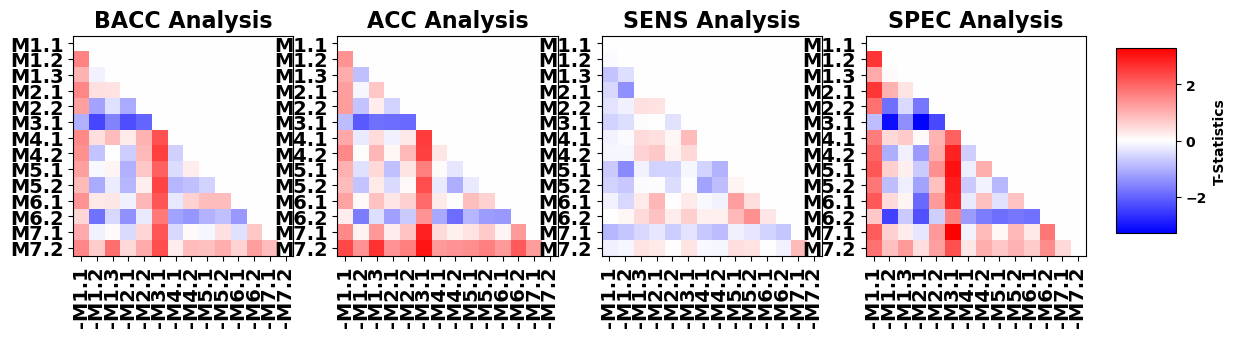

In [24]:
# PLOT HEATMAPS OF T-TEST RESULTS
fig, ax = plt.subplots(1,4,figsize=(15,5))
for idx in range(4):
    if idx == 0:
        t_stat = t_stat_bacc.copy()
        p_vals_corrected = p_vals_bacc_corrected.copy()
        title_val = 'BACC '
    elif idx == 1:
        t_stat = t_stat_acc.copy()
        p_vals_corrected = p_vals_acc_corrected.copy()
        title_val = 'ACC '
    elif idx == 2:
        t_stat = t_stat_sens.copy()
        p_vals_corrected = p_vals_sens_corrected.copy()
        title_val = 'SENS '
    elif idx == 3:
        t_stat = t_stat_spec.copy()
        p_vals_corrected = p_vals_spec_corrected.copy()
        title_val = 'SPEC '

    max_val = np.max(np.absolute(np.concatenate((t_stat_acc,t_stat_sens,t_stat_spec))))
    
    t_stat2 = t_stat.copy()
    for i in range(n_tests):
        for j in range(n_tests):
            if t_stat[i,j] == 0:
                t_stat2[i,j] = np.nan
    im = ax[idx].imshow(t_stat,cmap='bwr',vmin = -1*max_val,vmax=max_val)
    ax[idx].set_yticks(np.arange(n_tests))
    ax[idx].set_yticklabels(index,weight='bold',fontsize=14)
    ax[idx].set_xticks(np.arange(n_tests))
    ax[idx].set_xticklabels(columns,weight='bold',fontsize=14,rotation=90)
    ax[idx].set_title(title_val + 'Analysis',weight='bold',fontsize=16)
    for i in range(n_tests):
        for j in range(n_tests):
            if p_vals_corrected[i,j] < 0.05:
                ax[idx].text(j,i+0.21,'*',color='k',weight='bold',fontsize=25,verticalalignment='center',horizontalalignment='center')

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([.82, 0.32, 0.04, 0.37]) # left bottom width height
cb = fig.colorbar(im, cax=cbar_ax);
cb.set_label(label='T-Statistics',weight='bold')
plt.setp(cb.ax.get_yticklabels(),weight='bold');

# plt.savefig('/home/users/cellis42/Spectral_Explainability/PreTraining/EMBC2024/Performance_Testing.png')